In [30]:
import pandas as pd

In [31]:
df = pd.read_csv('Housing.csv')

In [32]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [33]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [34]:
import pandas as pd

# Change the path to where your file is located
df = pd.read_csv('Housing.csv')



Dataset shape: (545, 13)

First 5 rows:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeInde

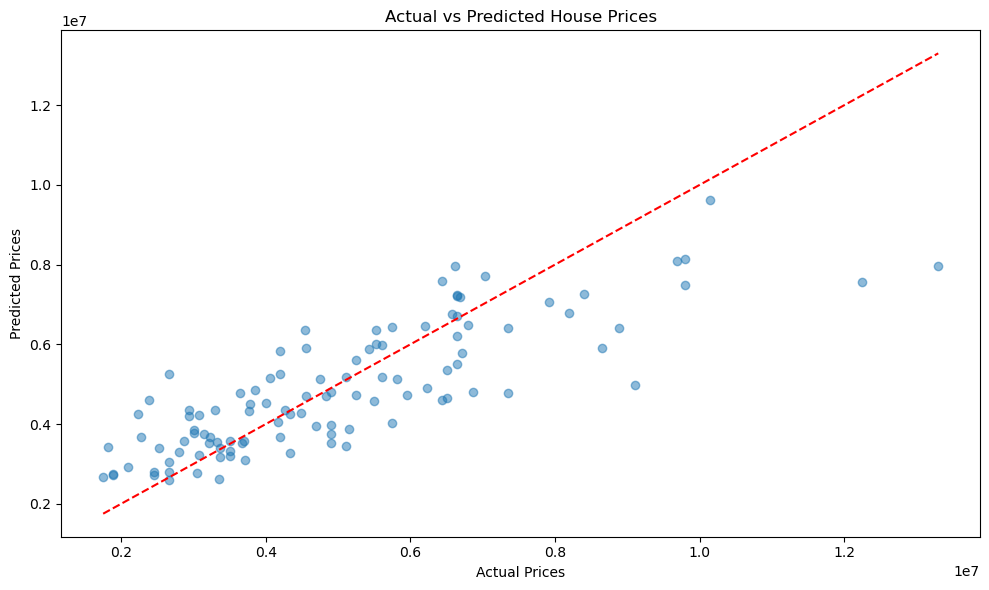

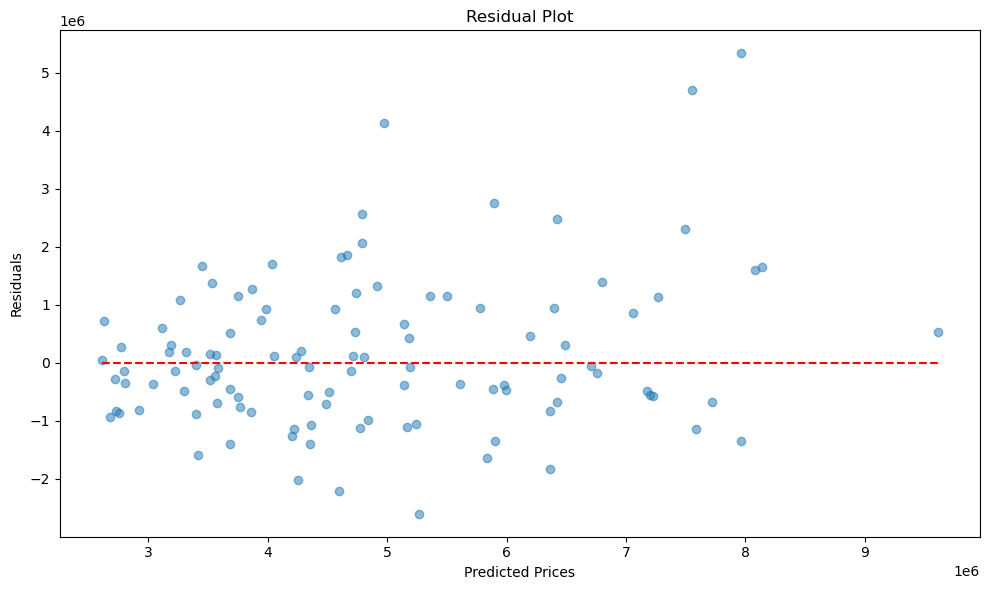

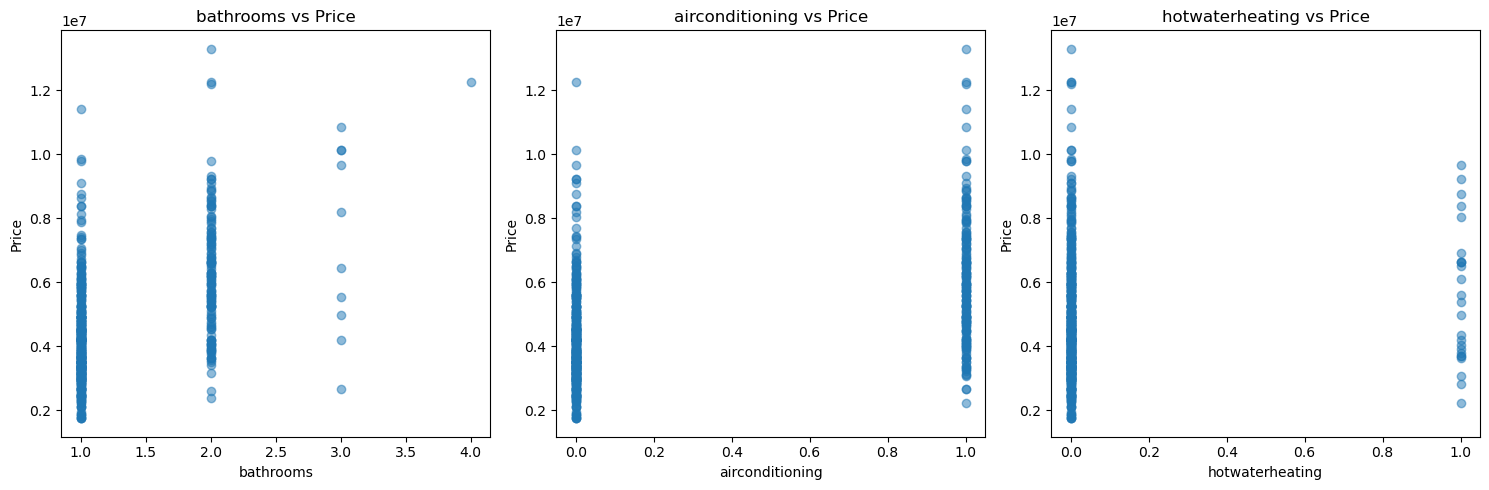

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

# 1. Load the dataset
data = pd.read_csv('Housing.csv')

# 2. Data exploration
print("Dataset shape:", data.shape)
print("\nFirst 5 rows:")
print(data.head())
print("\nData info:")
print(data.info())
print("\nDescriptive statistics:")
print(data.describe())

# 3. Check for missing values
print("\nMissing values:")
print(data.isnull().sum())

# 4. Feature engineering - Convert categorical variables to numeric
# Identify categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns

# Convert 'yes'/'no' categorical variables to 1/0
for col in categorical_cols:
    if set(data[col].unique()) == {'yes', 'no'}:
        data[col] = data[col].map({'yes': 1, 'no': 0})
    else:
        # One-hot encode other categorical variables
        encoder = OneHotEncoder(sparse_output=False, drop='first')
        encoded_cols = pd.DataFrame(
            encoder.fit_transform(data[[col]]),
            columns=[f"{col}_{cat}" for cat in encoder.get_feature_names_out([col])]
        )
        data = pd.concat([data.drop(col, axis=1), encoded_cols], axis=1)

# 5. Split features and target variable
X = data.drop('price', axis=1)
y = data['price']

# 6. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# 8. Make predictions
y_pred = model.predict(X_test)

# 9. Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared: {r2:.4f}")

# 10. Feature importance analysis
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
feature_importance = feature_importance.sort_values(by='Coefficient', key=abs, ascending=False)

print("\nFeature Importance:")
print(feature_importance)

# 11. Visualize predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.tight_layout()
plt.savefig('price_prediction.png')

# 12. Visualize residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), color='r', linestyle='--')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.tight_layout()
plt.savefig('residuals.png')

# 13. Scatter plots of the most important features vs price
top_features = feature_importance['Feature'].head(3).tolist()
fig, axes = plt.subplots(1, len(top_features), figsize=(15, 5))
for i, feature in enumerate(top_features):
    axes[i].scatter(X[feature], y, alpha=0.5)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Price')
    axes[i].set_title(f'{feature} vs Price')
plt.tight_layout()
plt.savefig('feature_price_scatter.png')

print("\nLinear Regression model implementation completed!")

In [36]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
